<a href="https://colab.research.google.com/github/nandinisnair/Network-Science/blob/main/logisticregressionmodel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
import pandas as pd
from google.colab import files
# Upload the dataset manually
uploaded = files.upload()
file_name = "german_credit_data.csv"
data = pd.read_csv(file_name)

Saving german_credit_data.csv to german_credit_data (2).csv


In [ ]:
# Display the first few rows of the dataset to understand its structure
data.head(), data.info(), data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        1000 non-null   int64 
 1   Age               1000 non-null   int64 
 2   Sex               1000 non-null   object
 3   Job               1000 non-null   int64 
 4   Housing           1000 non-null   object
 5   Saving accounts   817 non-null    object
 6   Checking account  606 non-null    object
 7   Credit amount     1000 non-null   int64 
 8   Duration          1000 non-null   int64 
 9   Purpose           1000 non-null   object
dtypes: int64(5), object(5)
memory usage: 78.2+ KB


(   Unnamed: 0  Age     Sex  Job Housing Saving accounts Checking account  \
 0           0   67    male    2     own             NaN           little   
 1           1   22  female    2     own          little         moderate   
 2           2   49    male    1     own          little              NaN   
 3           3   45    male    2    free          little           little   
 4           4   53    male    2    free          little           little   
 
    Credit amount  Duration              Purpose  
 0           1169         6             radio/TV  
 1           5951        48             radio/TV  
 2           2096        12            education  
 3           7882        42  furniture/equipment  
 4           4870        24                  car  ,
 None,
         Unnamed: 0          Age          Job  Credit amount     Duration
 count  1000.000000  1000.000000  1000.000000    1000.000000  1000.000000
 mean    499.500000    35.546000     1.904000    3271.258000    20.903000


In [ ]:
# Dropping irrelevant columns
if 'Unnamed: 0' in data.columns:
    data_cleaned = data.drop(columns=['Unnamed: 0'])
else:
    data_cleaned = data
print("Dropped irrelevant columns, if any.")
print(data_cleaned.head())

Dropped irrelevant columns, if any.
   Age     Sex  Job Housing Saving accounts Checking account  Credit amount  \
0   67    male    2     own             NaN           little           1169   
1   22  female    2     own          little         moderate           5951   
2   49    male    1     own          little              NaN           2096   
3   45    male    2    free          little           little           7882   
4   53    male    2    free          little           little           4870   

   Duration              Purpose  
0         6             radio/TV  
1        48             radio/TV  
2        12            education  
3        42  furniture/equipment  
4        24                  car  


In [ ]:
# Handle missing values for 'Saving accounts' and 'Checking account'
for column in ['Saving accounts', 'Checking account']:
    data_cleaned[column] = data_cleaned[column].fillna('unknown')
print("Missing values after handling:")
print(data_cleaned.isnull().sum())

Missing values after handling:
Age                 0
Sex                 0
Job                 0
Housing             0
Saving accounts     0
Checking account    0
Credit amount       0
Duration            0
Purpose             0
dtype: int64


In [ ]:
# Encoding categorical variables
categorical_columns = ['Sex', 'Housing', 'Saving accounts', 'Checking account', 'Purpose']
encoder = OneHotEncoder(sparse_output=False, drop='first')  # Use sparse_output=False
encoded_features = encoder.fit_transform(data_cleaned[categorical_columns])
encoded_feature_names = encoder.get_feature_names_out(categorical_columns)
encoded_df = pd.DataFrame(encoded_features, columns=encoded_feature_names, index=data_cleaned.index)
# Displaying the features
print("Encoded features:")
print(encoded_df.head())

Encoded features:
   Sex_male  Housing_own  Housing_rent  Saving accounts_moderate  \
0       1.0          1.0           0.0                       0.0   
1       0.0          1.0           0.0                       0.0   
2       1.0          1.0           0.0                       0.0   
3       1.0          0.0           0.0                       0.0   
4       1.0          0.0           0.0                       0.0   

   Saving accounts_quite rich  Saving accounts_rich  Saving accounts_unknown  \
0                         0.0                   0.0                      1.0   
1                         0.0                   0.0                      0.0   
2                         0.0                   0.0                      0.0   
3                         0.0                   0.0                      0.0   
4                         0.0                   0.0                      0.0   

   Checking account_moderate  Checking account_rich  Checking account_unknown  \
0          

In [ ]:
# Combine encoded features with numeric ones
data_preprocessed = pd.concat(
    [data_cleaned.drop(columns=categorical_columns + ['Job']), encoded_df], axis=1
)
# Display the preprocessed dataset
print("Preprocessed dataset:")
print(data_preprocessed.head())

Preprocessed dataset:
   Age  Credit amount  Duration  Sex_male  Housing_own  Housing_rent  \
0   67           1169         6       1.0          1.0           0.0   
1   22           5951        48       0.0          1.0           0.0   
2   49           2096        12       1.0          1.0           0.0   
3   45           7882        42       1.0          0.0           0.0   
4   53           4870        24       1.0          0.0           0.0   

   Saving accounts_moderate  Saving accounts_quite rich  Saving accounts_rich  \
0                       0.0                         0.0                   0.0   
1                       0.0                         0.0                   0.0   
2                       0.0                         0.0                   0.0   
3                       0.0                         0.0                   0.0   
4                       0.0                         0.0                   0.0   

   Saving accounts_unknown  Checking account_moderate  Che

In [ ]:
# Encoding categorical variables
categorical_columns = ['Sex', 'Housing', 'Saving accounts', 'Checking account', 'Purpose']
encoder = OneHotEncoder(sparse_output=False, drop='first')  # Use sparse_output=False
encoded_features = encoder.fit_transform(data_cleaned[categorical_columns])
encoded_feature_names = encoder.get_feature_names_out(categorical_columns)
encoded_df = pd.DataFrame(encoded_features, columns=encoded_feature_names, index=data_cleaned.index)
# Displaying the features
print("Encoded features:")
print(encoded_df.head())

Encoded features:
   Sex_male  Housing_own  Housing_rent  Saving accounts_moderate  \
0       1.0          1.0           0.0                       0.0   
1       0.0          1.0           0.0                       0.0   
2       1.0          1.0           0.0                       0.0   
3       1.0          0.0           0.0                       0.0   
4       1.0          0.0           0.0                       0.0   

   Saving accounts_quite rich  Saving accounts_rich  Saving accounts_unknown  \
0                         0.0                   0.0                      1.0   
1                         0.0                   0.0                      0.0   
2                         0.0                   0.0                      0.0   
3                         0.0                   0.0                      0.0   
4                         0.0                   0.0                      0.0   

   Checking account_moderate  Checking account_rich  Checking account_unknown  \
0          

In [ ]:
# Define target "y" and predictors "X"
X = data_preprocessed
y = data_cleaned['Job']
print("Predictors (X) shape:", X.shape)
print("Target (y) shape:", y.shape)

Predictors (X) shape: (1000, 20)
Target (y) shape: (1000,)


In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)

Training set shape: (800, 20) (800,)
Testing set shape: (200, 20) (200,)


In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((800, 20), (200, 20), (800,), (200,))

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
model = LogisticRegression(solver='saga', max_iter=2000, random_state=42)

In [ ]:
model.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=2000, random_state=42, solver='saga')

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report
y_pred = model.predict(X_test_scaled)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, average='weighted'))
print("Recall:", recall_score(y_test, y_pred, average='weighted'))
print("F1 Score:", f1_score(y_test, y_pred, average='weighted'))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.625
Precision: 0.4471354166666666
Recall: 0.625
F1 Score: 0.5041494782819703
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         5
           1       0.00      0.00      0.00        50
           2       0.64      0.98      0.77       125
           3       0.50      0.15      0.23        20

    accuracy                           0.62       200
   macro avg       0.28      0.28      0.25       200
weighted avg       0.45      0.62      0.50       200



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/m

In [ ]:
coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_[0]
}).sort_values(by='Coefficient', ascending=False)

print("Feature Importance:\n", coefficients)

Feature Importance:
                         Feature  Coefficient
7    Saving accounts_quite rich     0.319598
18              Purpose_repairs     0.286320
14  Purpose_domestic appliances     0.259881
13                  Purpose_car     0.258954
10    Checking account_moderate     0.220560
9       Saving accounts_unknown     0.183078
11        Checking account_rich     0.178432
5                  Housing_rent     0.168166
0                           Age     0.119172
8          Saving accounts_rich     0.053242
1                 Credit amount     0.038212
15            Purpose_education     0.023246
4                   Housing_own    -0.016211
19      Purpose_vacation/others    -0.137032
16  Purpose_furniture/equipment    -0.254365
3                      Sex_male    -0.259995
2                      Duration    -0.367684
17             Purpose_radio/TV    -0.443509
6      Saving accounts_moderate    -0.548303
12     Checking account_unknown    -0.688397


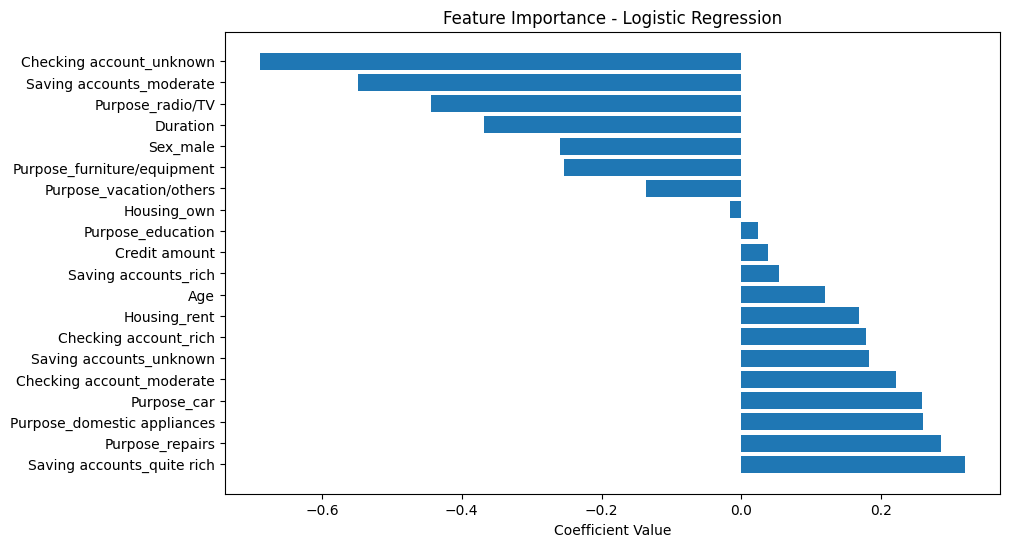

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.barh(coefficients['Feature'], coefficients['Coefficient'])
plt.xlabel('Coefficient Value')
plt.title('Feature Importance - Logistic Regression')
plt.show()

In [ ]:
from sklearn.feature_selection import RFE

In [ ]:
# Perform feature selection with RFE
selector = RFE(model, n_features_to_select=10)
X_train_rfe = selector.fit_transform(X_train_scaled, y_train)
X_test_rfe = selector.transform(X_test_scaled)

In [ ]:
selected_features = X.columns[selector.support_]
print("Selected features after RFE:", selected_features)

Selected features after RFE: Index(['Credit amount', 'Duration', 'Housing_own', 'Saving accounts_moderate',
       'Saving accounts_quite rich', 'Checking account_unknown',
       'Purpose_domestic appliances', 'Purpose_furniture/equipment',
       'Purpose_radio/TV', 'Purpose_repairs'],
      dtype='object')


In [ ]:
from sklearn.model_selection import cross_val_score
# Perform cross-validation on the model using the RFE-selected features
cv_scores = cross_val_score(model, X_train_rfe, y_train, cv=5, scoring='accuracy')
print(f"Cross-Validation Scores: {cv_scores}")
print(f"Average Cross-Validation Accuracy: {cv_scores.mean()}")

Cross-Validation Scores: [0.6375  0.64375 0.63125 0.63125 0.6375 ]
Average Cross-Validation Accuracy: 0.6362500000000001


In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# Create and train a Random Forest model for comparison
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_scaled, y_train)
rf_pred = rf_model.predict(X_test_scaled)

In [ ]:
print(f"Random Forest Accuracy: {accuracy_score(y_test, rf_pred)}")

Random Forest Accuracy: 0.605


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

In [ ]:
# Perform hyperparameter tuning
param_grid = {
    'C': [0.1, 1, 10],
    'solver': ['saga', 'liblinear'],
    'max_iter': [1000, 2000]
}

In [ ]:
grid_search = GridSearchCV(LogisticRegression(random_state=42), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_scaled, y_train)
print(f"Best Hyperparameters: {grid_search.best_params_}")
print(f"Best Cross-Validation Accuracy: {grid_search.best_score_}")

Best Hyperparameters: {'C': 0.1, 'max_iter': 1000, 'solver': 'liblinear'}
Best Cross-Validation Accuracy: 0.6475
